In [5]:
import os
from workflow import convert_csv
from workflow import pre_processing
from workflow import pre_train
from workflow import training
from workflow import score_prediction
from workflow import plot_conf_matrix
from workflow import plot_metrics
from workflow import feature_selection_RFE
from workflow import correlation_matrix
from workflow import feature_selection_KBest

In [10]:
WORK_DIR = os.getcwd()
data_kidney = os.path.join(WORK_DIR, "kidney_disease.csv")
data_banknote = os.path.join(WORK_DIR, "data_banknote_authentication.txt" )
list_models = ["Logistic Regression", "Linear SVC", "Random Forest", "Gradient Boosting", "Neural Networks"]

# Kidney Disease
list_pred_1 = []
Accuracy_1 = []
Recall_1 = []

# Banknote Authentification
list_pred_2 = []
Accuracy_2 = []
Recall_2 = []


**Kidney Disease Dataset**

3/3 [==============================] - 0s 997us/step


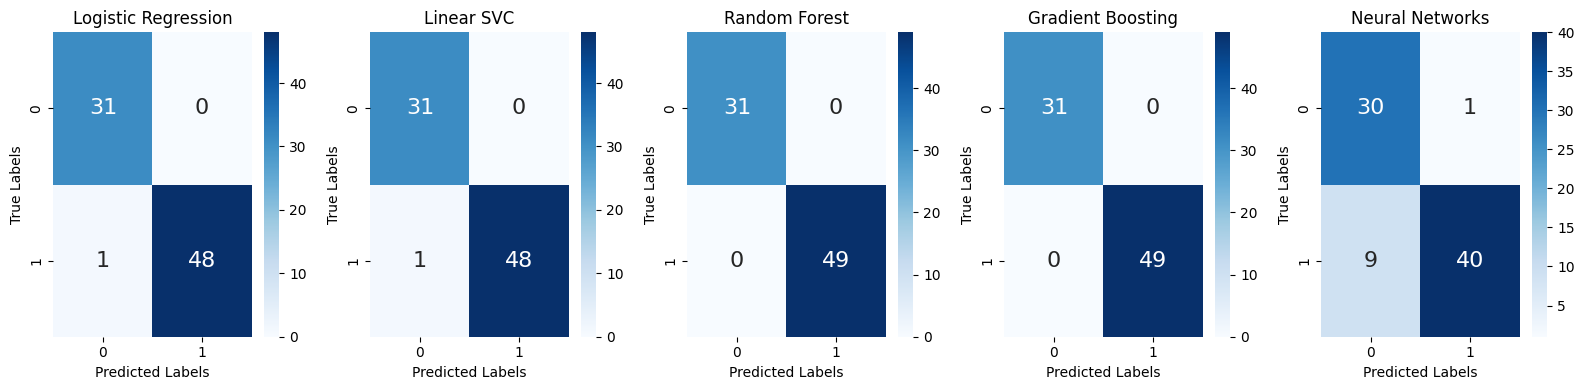

In [11]:
dataset = pre_processing(data_kidney)
x_train, x_test, y_train, y_test = pre_train(dataset)
for model in list_models:
    y_pred = training(x_train, x_test, y_train, model)
    list_pred_1.append(y_pred)
    Accuracy_1.append(score_prediction(y_test, y_pred)[0])
    Recall_1.append(score_prediction(y_test, y_pred)[1])

plot_conf_matrix(y_test, list_pred_1, list_models)

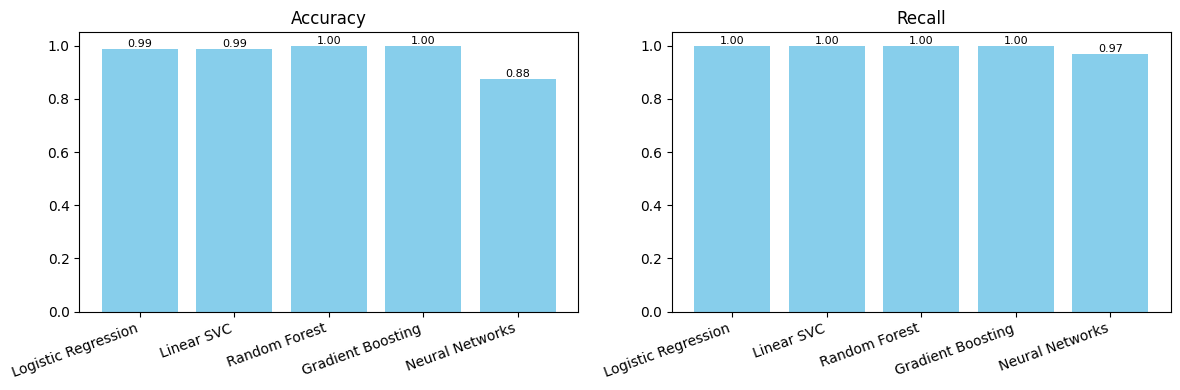

In [12]:
plot_metrics(list_models, Accuracy_1, Recall_1)

**Banknote Dataset**

9/9 [==============================] - 0s 626us/step


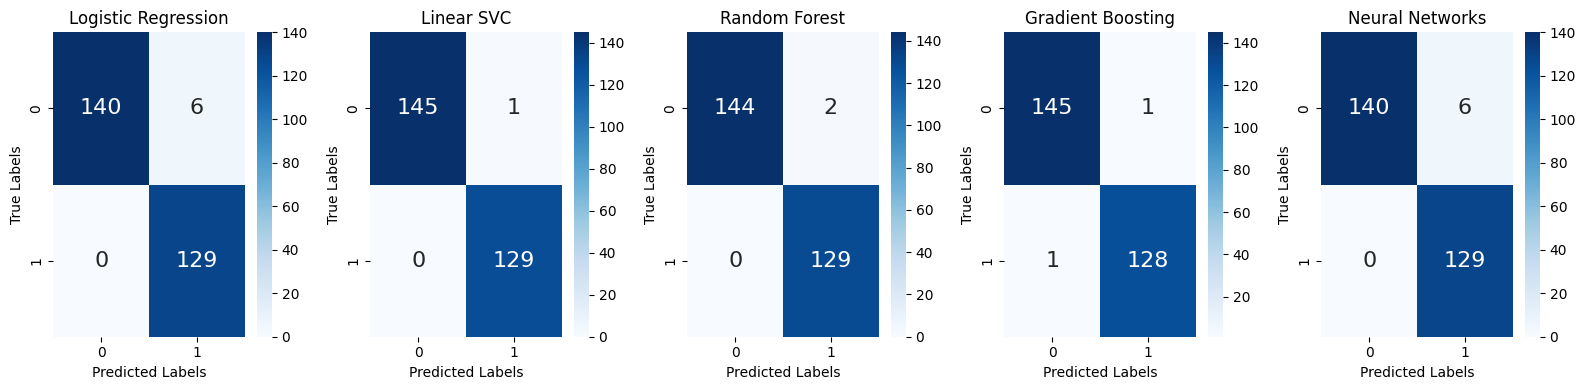

In [14]:
list_pred_2 = []
Accuracy_2 = []
Recall_2 = []

dataset = pre_processing(data_banknote)
x_train, x_test, y_train, y_test = pre_train(dataset)
for model in list_models:
    y_pred = training(x_train, x_test, y_train, model)
    list_pred_2.append(y_pred)
    Accuracy_2.append(score_prediction(y_test, y_pred)[0])
    Recall_2.append(score_prediction(y_test, y_pred)[1])

plot_conf_matrix(y_test, list_pred_2, list_models)

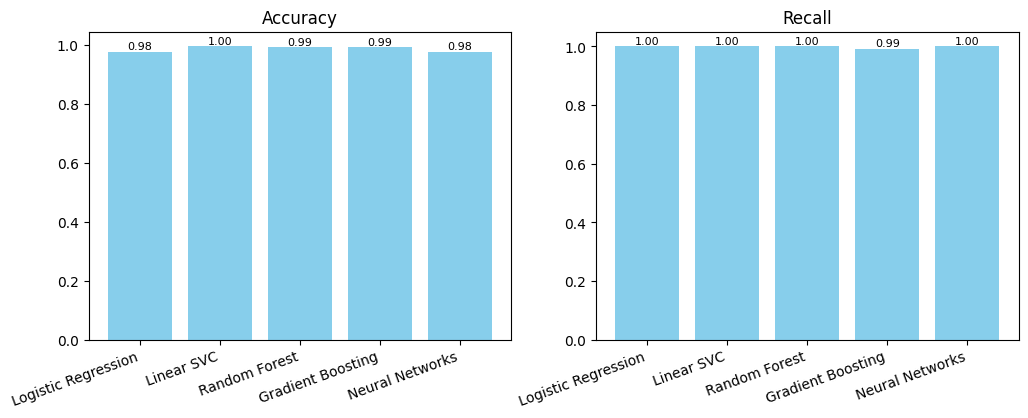

In [15]:
plot_metrics(list_models, Accuracy_2, Recall_2)

**Further Works on Feature Selection on the Kidney Disease dataset**

In [14]:
list_models = ["Logistic Regression", "Linear SVC", "Random Forest", "Gradient Boosting", "Neural Networks"]
dataset = pre_processing(data_kidney)
x = dataset.to_numpy()[:,:-1]
y = dataset.to_numpy()[:,-1]

**Correlation**

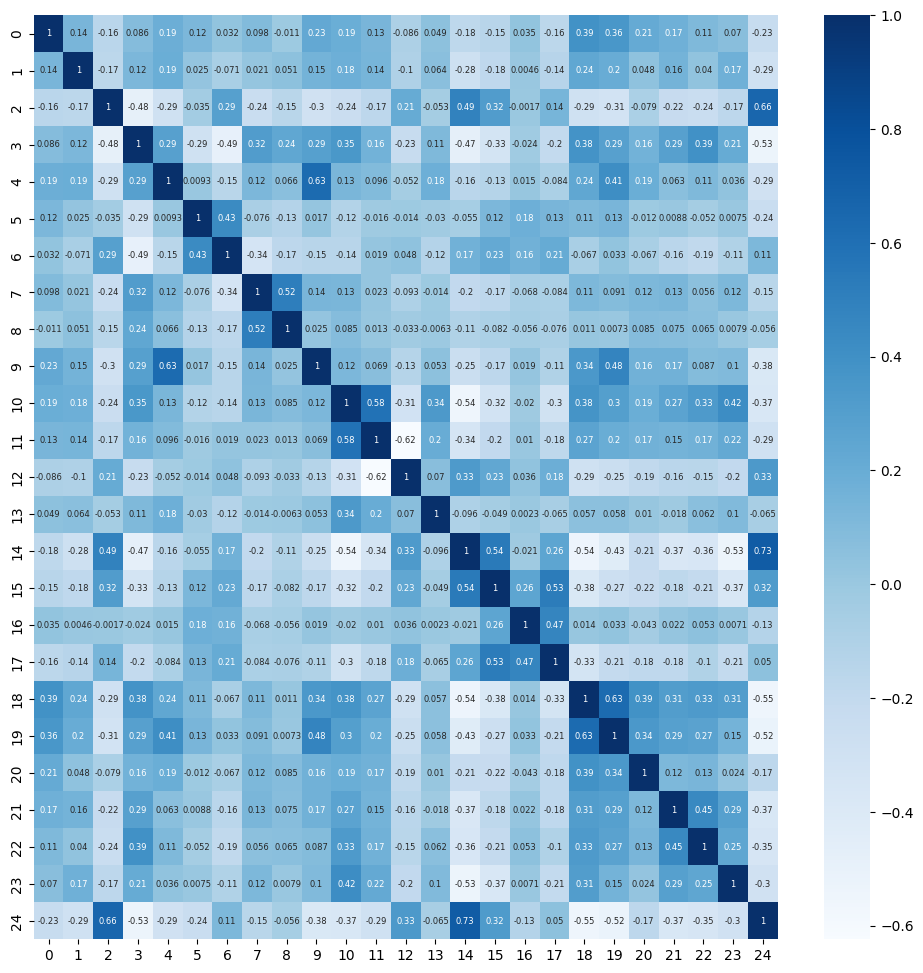

In [15]:
correlation_matrix(dataset)

**SelectKBest**

In [16]:
list_pred_KB = []
Accuracy_KB = []
Recall_KB = []

K = 3
dataset_transformed, feature_relevance = feature_selection_KBest(x,y,K)
print("Index of Relevant feature in descending order of importance", feature_relevance)

x_train, x_test, y_train, y_test = pre_train(dataset_transformed)
print("Number of Features", x_train.shape[1])
for model in list_models:
    y_pred = training(x_train, x_test, y_train, model)
    list_pred_KB.append(y_pred)
    Accuracy_KB.append(score_prediction(y_test, y_pred)[0])
    Recall_KB.append(score_prediction(y_test, y_pred)[1])

Index of Relevant feature in descending order of importance [14  2 18  3 19  9 10 21 22 12 15 23  4  1 11  5  0 20  7 16  6 13  8 17]
Number of Features 3
3/3 [==============================] - 0s 997us/step


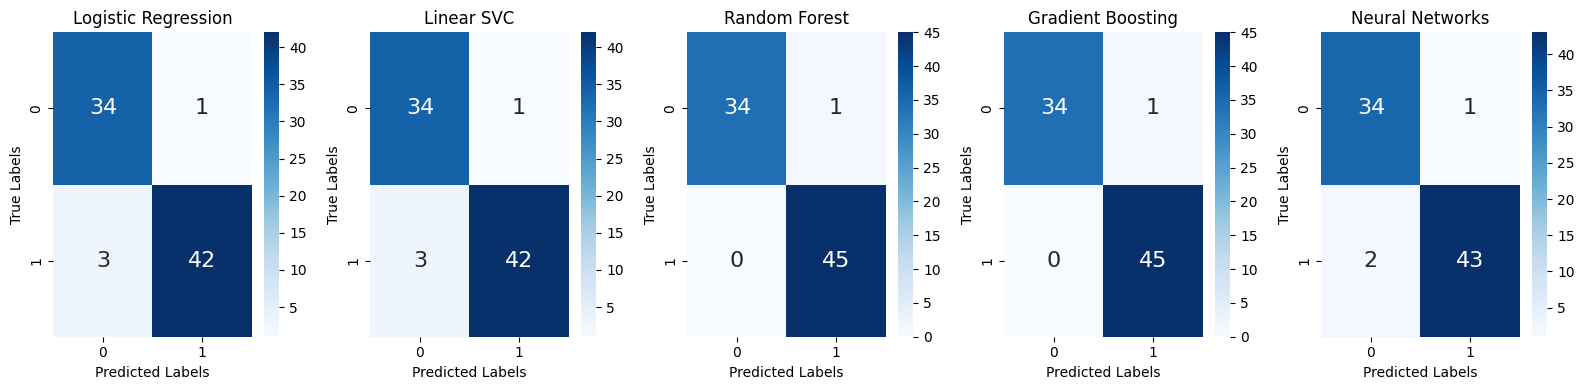

In [17]:
plot_conf_matrix(y_test, list_pred_KB, list_models)

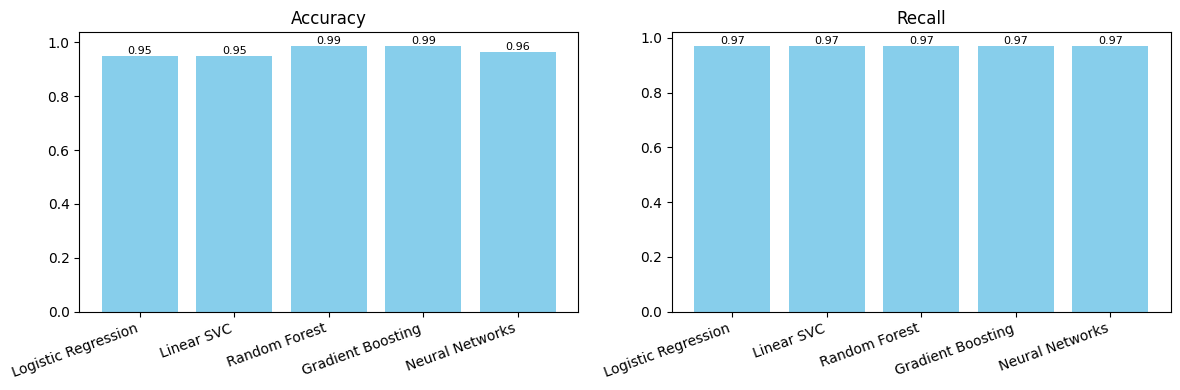

In [18]:
plot_metrics(list_models, Accuracy_KB, Recall_KB)

**Recursive Feature Elimination (RFE)**

Doesn't work on SVC nor tensorflow

In [64]:
list_models = ["Logistic Regression", "Random Forest", "Gradient Boosting"]
feature_relevance = feature_selection_RFE(list_models, 3, x, y)
print(feature_relevance)

[[13.  9.  1.  1. 10.  2. 21. 18. 12.  5. 14.  4.  8. 16.  1. 20. 22. 19.
   3.  7. 15.  6. 11. 17.]
 [11. 15.  1.  2. 14.  3. 13. 20. 21.  9. 10.  1.  6. 17.  1.  4. 12.  7.
   5.  8. 22. 18. 16. 19.]
 [ 3. 10.  1.  1. 15.  6. 20.  8. 12.  9.  5.  2.  4. 18.  1. 11.  7. 14.
  19. 17. 21. 13. 16. 22.]]


This method also shows that features of index 2 and 14, along with 3 seem to be the most significant. The results will be the same as the one above using KBest as the features selected are the same.